<a href="https://colab.research.google.com/github/Belita-Lili/Analisis-de-Datos-Diabetes/blob/main/Ex3_LiliBeTa_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a id='toc1_'></a>[Python básico (IA)](#toc0_)
## <a id='toc1_1_'></a>[Examen módulo 3](#toc0_)
### <a id='toc1_1_1_'></a>[Modelación](#toc0_)


**Table of contents**<a id='toc0_'></a>    
- [Python básico (IA)](#toc1_)    
  - [Examen módulo 3](#toc1_1_)    
    - [Modelación](#toc1_1_1_)    
  - [Instrucciones](#toc1_2_)    
- [Defunciones México](#toc2_)    
- [Parte 1. Análisis exploratorio](#toc3_)    
  - [Importante:](#toc3_1_)    
- [Parte 2. Modelo de clasificación](#toc4_)    
- [Parte 3. Forecasting](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_2_'></a>[Instrucciones](#toc0_)

Realiza los ejercicios de la práctica. Los ejercicios están marcados por nivel como sigue

<ul>
<li> Muy fácil: (MF) = 0 puntos</li>
<li> Fácil: (F) = 1 punto</li>
<li> Medio: (M) = 2 puntos</li>
<li> Difícil: (D) = 3 puntos</li>
<li> Muy difícil: (MD) = 10 puntos</li>
</ul>

Y en algunos casos habrá retos extremos (EX) =  20 puntos.

Tu calificación será la suma de los puntos según la fórmula

\begin{equation}
Grado = \dfrac{n_{F} + 2n_{M}  +3n_{D} + 5n_{MD} + 20n_{EX}}{tot_{F} + 2tot_{M}  +3tot_{D} + 10tot_{MD} + 20tot_{EX}}
\end{equation}

donde $n_{x}$ es el total de ejercicios completados del nivel $x$ y $tot_{x}$ es el total de ejercicios del nivel $x$

---

**NOTA:**

¡¡En este examen TODOS los ejercicios cuentan, sin importar su nivel de dificultad!!



#-----> Ejecuta esta celda

Esta celda importa las librerías necesarias para esta tarea

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay

# Ajustar la visualización de filas y columnas
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', 1000)  # Ajusta el ancho para evitar el corte
pd.set_option('display.colheader_justify', 'left')  # Justifica los encabezados a la izquierda


# <a id='toc2_'></a>[Defunciones México](#toc0_)

<center>
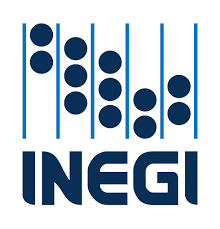</img>
</center>

Suponga que trabaja para el INEGI (Instituto Nacional de Estadística y Geografía) y se quiere analizar los casos de defunción por diabetes mellitus, enfermedad que ocupa uno de los primeros lugares en total de defunciones en México.


# <a id='toc3_'></a>[Parte 1. Análisis exploratorio](#toc0_)

Realiza un análisis sobre el conjunto de datos limpio intentando contestar las preguntas de negocio. En esta parte tienes libertad de mostrar tus hallazgos y puedes utilizar los métodos y gráficos que consideres adecuados.

La evaluación de esta sección es un tercio del valor del examen y se evaluará según justifiques cada pregunta.

## <a id='toc3_1_'></a>[Importante:](#toc0_)

Es importante que comentes tu código y escribas paso a paso lo que estás haciendo. Este notebook debe ser un reporte con código y debe poder entenderse claramente tanto procedimiento como explicación (apóyate de las celdas de texto).

Todo lo que hayas usado para explorar que no sirva para responder las preguntas debes eliminarlo

Lee el conjunto de datos del INEGI sobre defunciones en México en 2015. Analiza los registros utilizando los métodos y procedimientos vistos en clase.

El análisis y el reporte que hagas debe contestar las siguientes preguntas.

1. ¿Hay similitud o diferencia entre las características de los casos de defunción por diabetes mellitus entre hombres y mujeres?
2. ¿Cuáles son las característica principales que observas para las personas que fallecieron por causa de la diabetes mellitus?
3. ¿En qué meses y en qué estados hay mayor abundancia de defunciones por la enfermedad?

In [ ]:
defun = pd.read_csv("defun_2015.csv")

In [ ]:
print(defun.head())
print(defun.info())

  ENT_RESID       MUN_RESID       LOC_RESID       ENT_OCURR       MUN_OCURR       LOC_OCURR       CAUSA_DEF                                          LISTA_MEX                                          SEXO     EDAD  DIA_OCURR  MES_OCURR  ANIO_OCUR  DIA_NACIM  MES_NACIM  ANIO_NACIM OCUPACION                                          ESCOLARIDA           EDO_CIVIL    PRESUNTO                       OCURR_TRAB                                    LUGAR_OCUR                     NECROPSIA         ASIST_MEDI             NACIONALID DERECHOHAB       VIO_FAMI                          AREA_UR LENGUA     COND_ACT PAR_AGRE   TLOC_RESID     TLOC_OCURR      DEFUN_DIAB
0  Aguascalientes  Aguascalientes  Aguascalientes  Aguascalientes  Aguascalientes  Aguascalientes                                     Edema pulmonar    Las demás enfermedades del aparato respiratorio  Hombre  69.0  17         7          2015       30          6         1946                                               No trabaja     Sin es

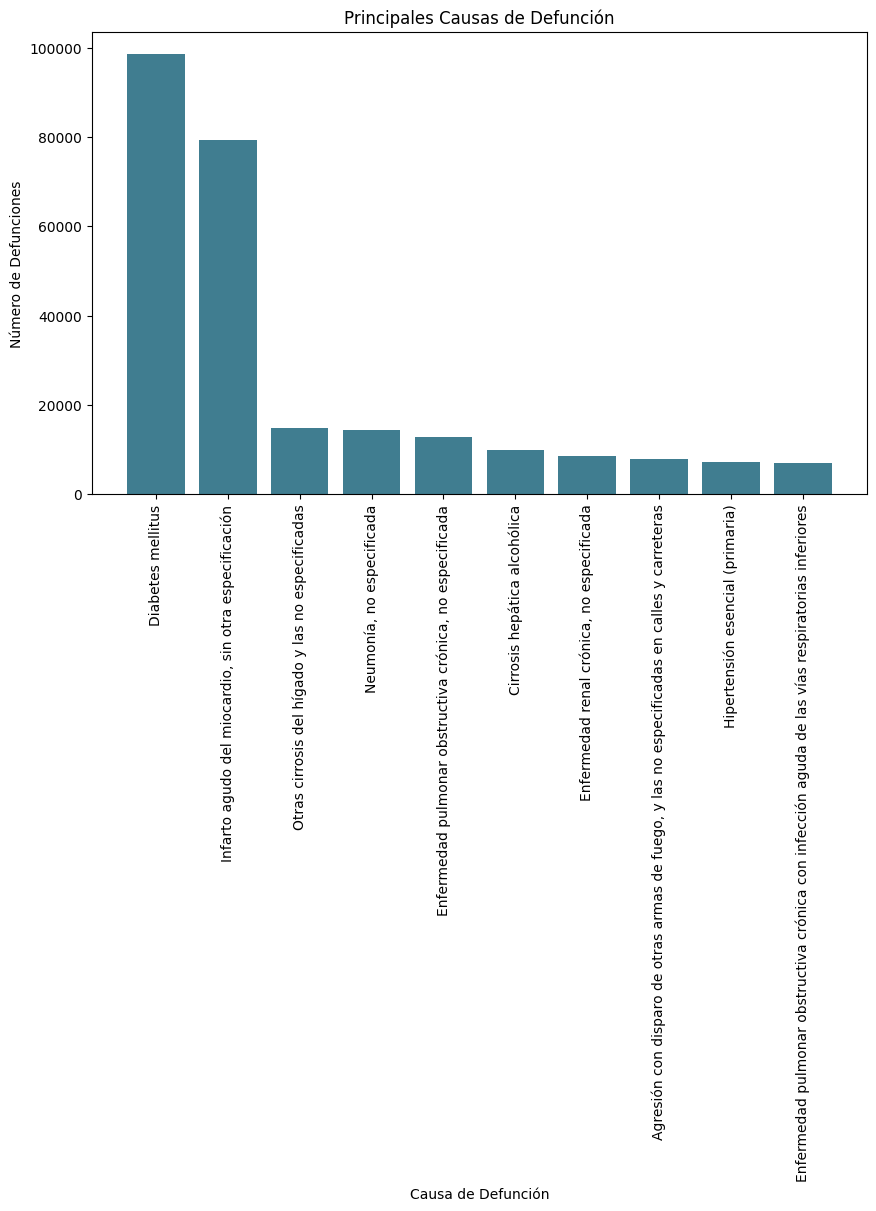

In [ ]:
# Cambiar todos los valores que empiecen con "Diabetes mellitus" a "Diabetes mellitus"
defun['CAUSA_DEF'] = defun['CAUSA_DEF'].apply(
    lambda x: 'Diabetes mellitus' if x.startswith('Diabetes mellitus') else x
)

# Contar las ocurrencias de cada causa de defunción
tabla_causas = defun['CAUSA_DEF'].value_counts().reset_index()

# Renombrar las columnas para que sean más claras
tabla_causas.columns = ['CAUSA_DEF', 'NUMERO_DEFUNCIONES']

# Ordenar por número de defunciones (ya debería estar ordenado por value_counts())
tabla_causas = tabla_causas.sort_values(by='NUMERO_DEFUNCIONES', ascending=False)

# Seleccionar las 10 principales causas de muerte
top_causas = tabla_causas.head(10)

# Crear gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(top_causas['CAUSA_DEF'], top_causas['NUMERO_DEFUNCIONES'], color='#407d90')
plt.xlabel('Causa de Muerte')
plt.ylabel('Número de Defunciones')
plt.title('Principales Causas de Defunción')
plt.xlabel('Causa de Defunción')
plt.ylabel('Número de Defunciones')
plt.xticks(rotation=90)
plt.show()

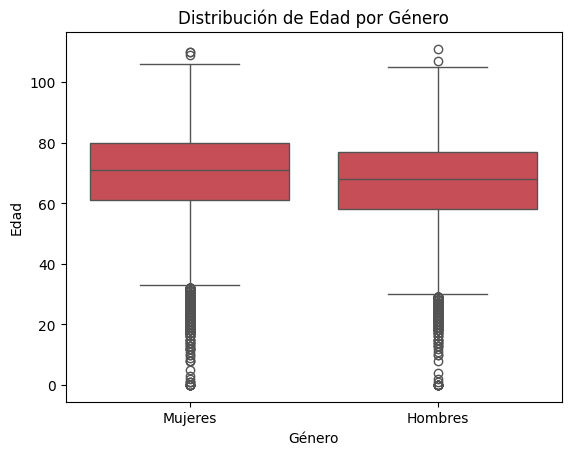

<ipython-input-198-d1933c88de80>:19: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#407d90'` for the same effect.

  sns.countplot(data=diabetes_cases, x='ESCOLARIDA', hue='SEXO', color='#407d90')


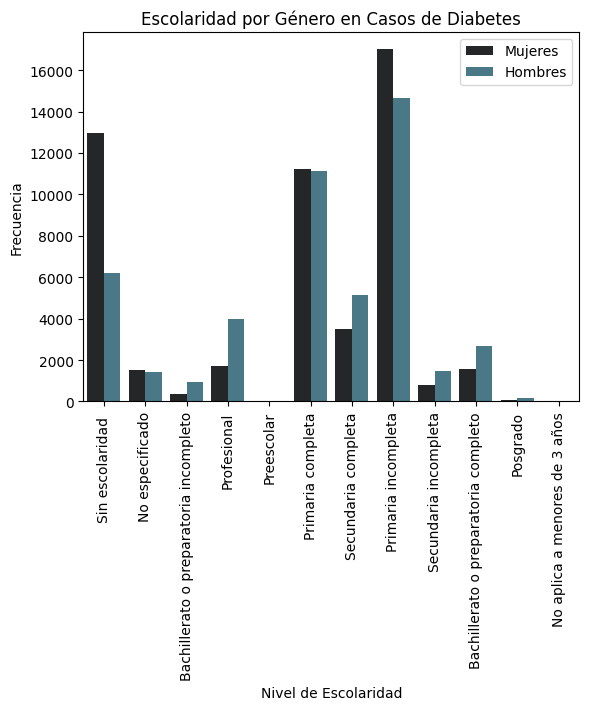

In [ ]:
# Filtrar casos de diabetes mellitus
diabetes_cases = defun[defun['CAUSA_DEF'].str.contains('Diabetes mellitus', na=False)]

# Agrupar por género
grouped_gender = diabetes_cases.groupby('SEXO')

# Estadísticas descriptivas por género
stats_by_gender = grouped_gender.describe()

# Visualización de edad por género
sns.boxplot(data=diabetes_cases, x='SEXO', y='EDAD', color='#da3b46')
plt.xticks([0, 1], ['Mujeres','Hombres'])
plt.title('Distribución de Edad por Género')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()

# Comparar variables como escolaridad
sns.countplot(data=diabetes_cases, x='ESCOLARIDA', hue='SEXO', color='#407d90')
plt.xticks(rotation=90)
plt.title('Escolaridad por Género en Casos de Diabetes')
plt.xlabel('Nivel de Escolaridad')
plt.ylabel('Frecuencia')
plt.legend(['Mujeres','Hombres'])
plt.show()

<ipython-input-201-4290d63d0921>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_features[col] = LabelEncoder().fit_transform(diabetes_features[col])
<ipython-input-201-4290d63d0921>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_features[col] = LabelEncoder().fit_transform(diabetes_features[col])
<ipython-input-201-4290d63d0921>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

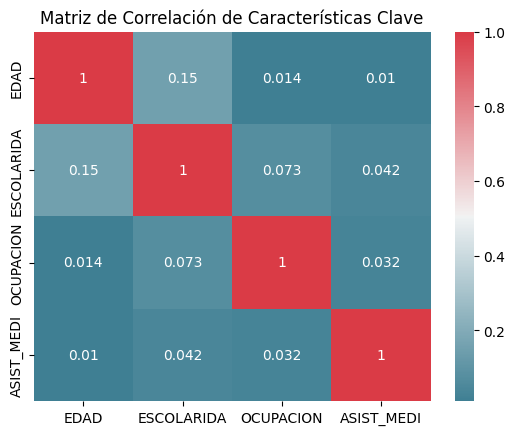

In [ ]:
# Selección de variables clave
variables_clave = ['EDAD', 'ESCOLARIDA', 'OCUPACION', 'ASIST_MEDI']

# Filtrar columnas relevantes
diabetes_features = diabetes_cases[variables_clave]

# Verificar si hay columnas no numéricas
non_numeric_cols = diabetes_features.select_dtypes(include=['object']).columns

# Si hay columnas no numéricas, manejarlas (por ejemplo, asignar valores numéricos o eliminarlas)
if len(non_numeric_cols) > 0:
    for col in non_numeric_cols:
        diabetes_features[col] = LabelEncoder().fit_transform(diabetes_features[col])

# Calcular la matriz de correlación después de transformar todas las columnas
correlation_matrix = diabetes_features.corr()

# Visualización de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap = sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Matriz de Correlación de Características Clave')
plt.show()

In [ ]:
# Eliminar todas las filas donde 'ENT_RESID' sea 'Estados unidos de América' y Otros países de Latinoamérica
df_sin_eua= defun[~defun['ENT_RESID'].isin(['Estados unidos de América', 'Otros países de Latinoamérica','Otros países'])]

# Filtrar solo las filas relacionadas con "Diabetes Mellitus"
diabetes_cases = df_sin_eua[df_sin_eua['CAUSA_DEF'].str.contains('Diabetes mellitus', case=False, na=False)]

# Crear un DataFrame de df_sin_eua
df = pd.DataFrame(df_sin_eua)

# Contar las defunciones por mes
conteo_por_mes = diabetes_cases['MES_OCURR'].value_counts()

# Filtrar meses válidos (1 a 12)
conteo_por_mes = conteo_por_mes[conteo_por_mes.index.isin(range(1, 13))]

# Contar las defunciones por estado
conteo_por_estado = diabetes_cases['ENT_RESID'].value_counts()

# Mostrar los resultados
print("Defunciones por mes:")
print(conteo_por_mes,conteo_por_estado)


Defunciones por mes:
MES_OCURR
1     10550
12     9442
3      8539
2      8494
11     8066
10     7959
7      7771
5      7768
8      7678
4      7532
9      7373
6      7282
Name: count, dtype: int64 ENT_RESID
México                             13846
Ciudad de México                    9671
Veracruz de Ignacio de la Llave     8716
Jalisco                             5964
Puebla                              5864
Guanajuato                          5213
Michoacán de Ocampo                 4029
Chiapas                             3423
Oaxaca                              3294
Nuevo León                          3287
Guerrero                            3138
Tamaulipas                          2992
Coahuila de Zaragoza                2694
Chihuahua                           2517
Tabasco                             2284
Hidalgo                             2118
Baja California                     2037
Sonora                              1847
Morelos                             1825
San Luis P

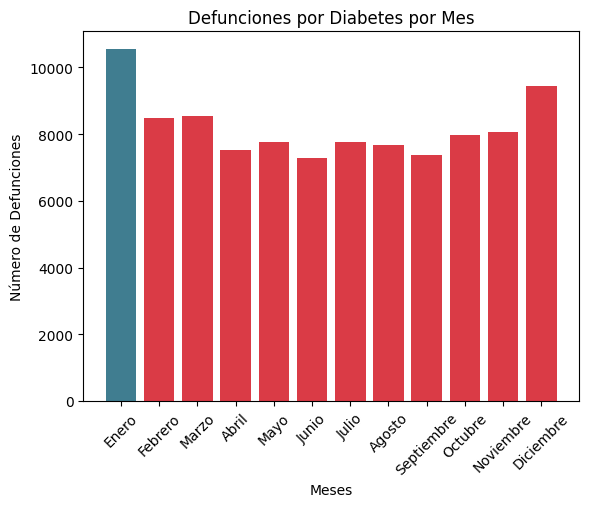

In [ ]:
# Identificar el índice del mes con más defunciones
indice_maximo = np.argmax(conteo_por_mes.values)

# Asignar colores: mediumturquoise para todos, teal para el máximo
colores = ['#da3b46' if i != indice_maximo else '#407d90' for i in range(len(conteo_por_mes))]

# Crear la gráfica de barras con colores personalizados
plt.bar(conteo_por_mes.index, conteo_por_mes.values, color=colores)

# Añadir etiquetas y título
plt.xlabel('Meses')
plt.ylabel('Número de Defunciones')
plt.title('Defunciones por Diabetes por Mes')

# Etiquetas de los meses
plt.xticks(
    range(1, 13),
    ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
     'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    rotation=45
)

# Mostrar la gráfica
plt.show()

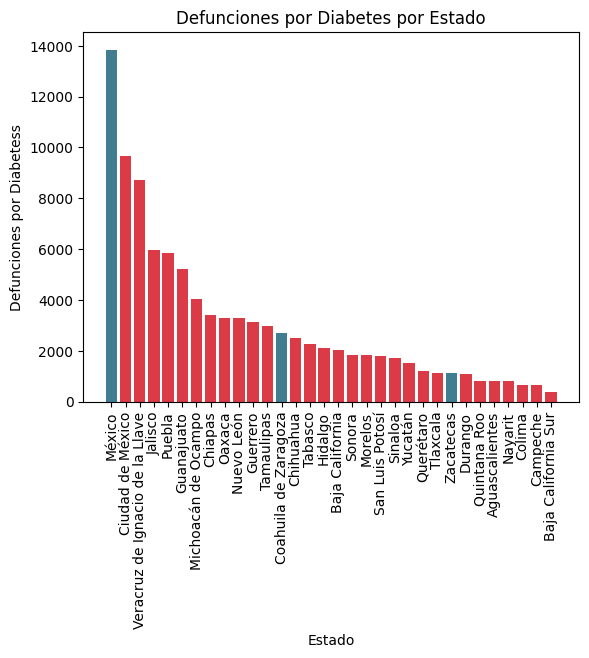

In [ ]:
# Identificar el índice del mes con más defunciones
indice_maximo_estado = np.argmax(conteo_por_estado.values)

# Asignar colores: mediumturquoise para todos, teal para el máximo
colores = ['#da3b46' if i != indice_maximo_estado else '#407d90' for i in range(len(conteo_por_mes))]

# Crear la gráfica de barras con colores personalizados
plt.bar(conteo_por_estado.index, conteo_por_estado.values, color=colores)

# Añadir etiquetas y título
plt.xlabel('Estado')
plt.ylabel('Defunciones por Diabetess')
plt.title('Defunciones por Diabetes por Estado')
plt.xticks(rotation=90)  # Rotar etiquetas de los estados

# for i, valor in enumerate(conteo_por_estado.values):
  #      plt.text(conteo_por_estado.index[i], valor + 10, str(valor), ha='center', fontsize=10)


# Mostrar la gráfica
plt.show()


In [ ]:
# Calcular estadísticas descriptivas de las columnas relevantes
edad_stats = diabetes_cases['EDAD'].describe()
genero_counts = diabetes_cases['SEXO'].value_counts()

# Mostrar resultados
print("Estadísticas de edad para defunciones por Diabetes Mellitus:")
print(edad_stats)

print("\nDistribución por género:")
print(genero_counts)

Estadísticas de edad para defunciones por Diabetes Mellitus:
count    98532.000000
mean        68.339332
std         13.560946
min          0.000000
25%         59.000000
50%         69.000000
75%         78.000000
max        111.000000
Name: EDAD, dtype: float64

Distribución por género:
SEXO
Mujer     50715
Hombre    47817
Name: count, dtype: int64


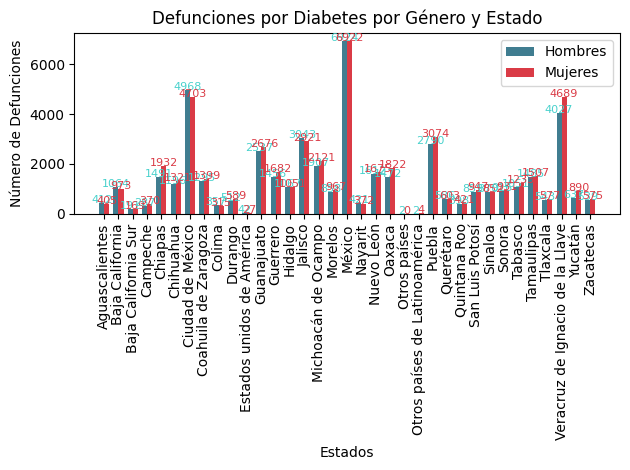

In [ ]:
# Agrupar por estado y género para contar defunciones
conteo_por_genero_estado = diabetes_cases.groupby(['ENT_RESID', 'SEXO']).size().unstack(fill_value=0)

# Crear etiquetas y valores
estados = conteo_por_genero_estado.index  # Nombres de los estados
hombres = conteo_por_genero_estado.get('Hombre', pd.Series(0, index=estados))  # Valores de "Hombre"
mujeres = conteo_por_genero_estado.get('Mujer', pd.Series(0, index=estados))  # Valores de "Mujer"

# Crear la gráfica de barras
x = np.arange(len(estados))  # Posiciones de los estados
ancho = 0.35  # Ancho de las barras

plt.bar(x - ancho / 2, hombres, width=ancho, color='#407d90', label='Hombres')
plt.bar(x + ancho / 2, mujeres, width=ancho, color='#da3b46', label='Mujeres')

# Añadir etiquetas y título
plt.xlabel('Estados')
plt.ylabel('Número de Defunciones')
plt.title('Defunciones por Diabetes por Género y Estado')
plt.xticks(x, estados, rotation=90)  # Rotar etiquetas de los estados
plt.legend()

# Mostrar valores encima de las barras
for i, (h, m) in enumerate(zip(hombres, mujeres)):
    plt.text(i - ancho / 2, h + 0.5, str(h), ha='center', fontsize=8, color='#48D1CC')
    plt.text(i + ancho / 2, m + 0.5, str(m), ha='center', fontsize=8, color='#da3b46')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# <a id='toc4_'></a>[Parte 2. Modelo de clasificación](#toc0_)

Utiliza la variable "DEFUN_DIAB" como variable objetivo e implementa un modelo de machine learning (Regresión logística) para clasificar si una persona falleció a causa de esta enfermadad o no. Tienes libertar para utilizar las variables que consideres prudente. Esta parte se califica sobre 3 aspectos

1. Preprocesamiento de la información (Manipulación de valores nulos o atípicos, separación de conjuntos, imputación, escalamiento, etc.)
2. Implementación del modelo
3. Evaluación del modelo (ROC o métricas sobre la matriz de correlación)

In [ ]:
# Cargar los datos
diab = pd.read_csv("DEFUN_DIAB_TS.csv")
df_all = pd.read_csv("DEFUN_ALL_TS.csv")

# Asegurar que las fechas sean datetime
diab['FECHA_OCURR'] = pd.to_datetime(diab['FECHA_OCURR'])
df_all['FECHA_OCURR'] = pd.to_datetime(df_all['FECHA_OCURR'])

# Verificar el rango de fechas
print(diab['FECHA_OCURR'].min(), diab['FECHA_OCURR'].max())
print(df_all['FECHA_OCURR'].min(), df_all['FECHA_OCURR'].max())


1941-09-27 00:00:00 2020-12-31 00:00:00
1914-03-14 00:00:00 2020-12-31 00:00:00


In [ ]:
# Filtrar los datos desde 2015
df_merge = diab[diab['FECHA_OCURR'].dt.year >= 2015]

# Verificamos las primeras filas después del filtrado
print(df_merge[['FECHA_OCURR', 'TOT_DEF_DIAB']].head())

     FECHA_OCURR  TOT_DEF_DIAB
1175 2015-01-01   350         
1176 2015-01-02   333         
1177 2015-01-03   338         
1178 2015-01-04   390         
1179 2015-01-05   362         


In [ ]:
df_merged = pd.merge(df_merge, df_all, on='FECHA_OCURR', how='inner', suffixes=('_diab', '_all'))

print(df_merged.head())  # Ver los primeros datos combinados


  FECHA_OCURR  TOT_DEF_DIAB  TOT_DEF
0 2015-01-01   350           2395   
1 2015-01-02   333           2192   
2 2015-01-03   338           2175   
3 2015-01-04   390           2186   
4 2015-01-05   362           2275   


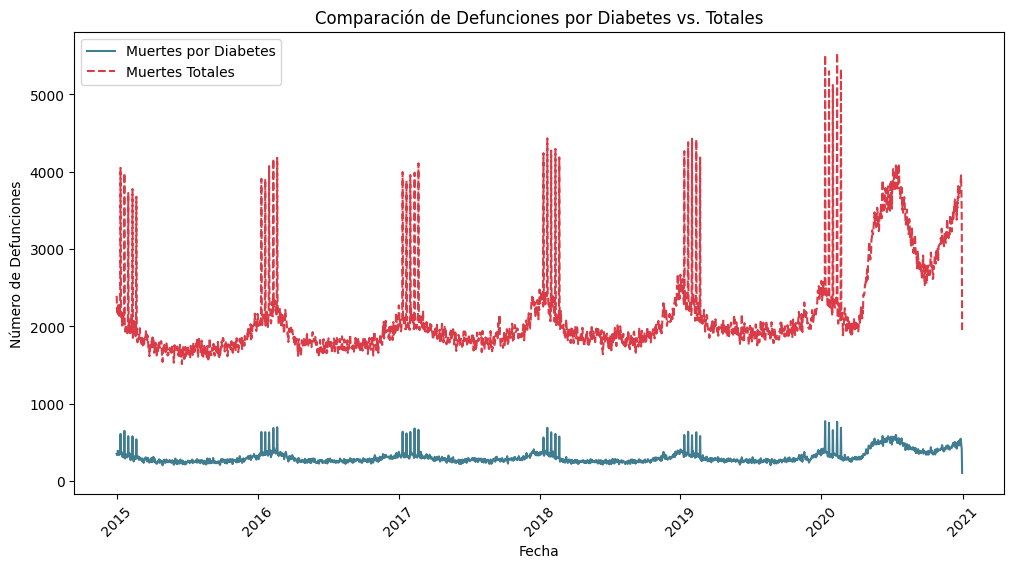

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_merged['FECHA_OCURR'], df_merged['TOT_DEF_DIAB'], label="Muertes por Diabetes", color='#407d90')
plt.plot(df_merged['FECHA_OCURR'], df_merged['TOT_DEF'], label="Muertes Totales", color='#da3b46', linestyle="dashed")

plt.xlabel("Fecha")
plt.ylabel("Número de Defunciones")
plt.title("Comparación de Defunciones por Diabetes vs. Totales")
plt.legend()
plt.xticks(rotation=45)
plt.show()


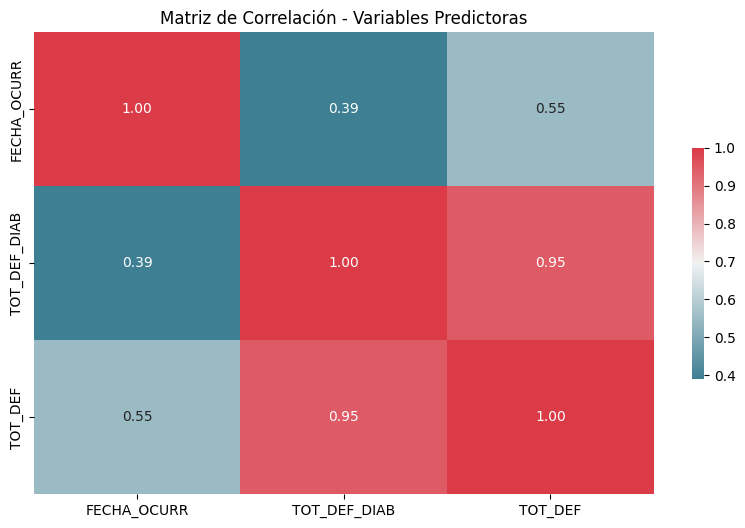

In [ ]:
# Crear la matriz de correlación
correlation_matrix = df_merged.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap = sns.diverging_palette(220, 10, as_cmap=True), fmt=".2f", cbar_kws={"shrink": .5})
plt.title("Matriz de Correlación - Variables Predictoras")
plt.show()



# <a id='toc5_'></a>[Parte 3. Forecasting](#toc0_)

Utiliza el conjunto de datos "DEFUN_DIAB_TS.csv", que contiene la cantidad de personas fallecidas por causa de la diabetes mellitus por día (desde 01-01-2015 hasta 31-12-2020), para crear un modelo de machine learning tal que puedas predecir el total de muertes por esta causa para los primeros 3 meses de 2021.

La evaluación se clasifica sobre 3 aspectos

1. Preprocesamiento de la información (Manipulación de valores nulos o atípicos, separación de conjuntos, imputación, escalamiento, etc.)
2. Implementación del modelo (Regresión lineal, ARMA, Suavización exponencial u otro)
3. Evaluación del modelo (Evaluar el desempeño en el conjunto de prueba usando métricas MSE o R2)

---
**NOTA** Puedes realizar tu modelo entrenando los datos agrupados por día, mes, semana u otro. El mes sería lo más común

In [ ]:
# Cargar el conjunto de datos
ts = pd.read_csv("DEFUN_DIAB_TS.csv")


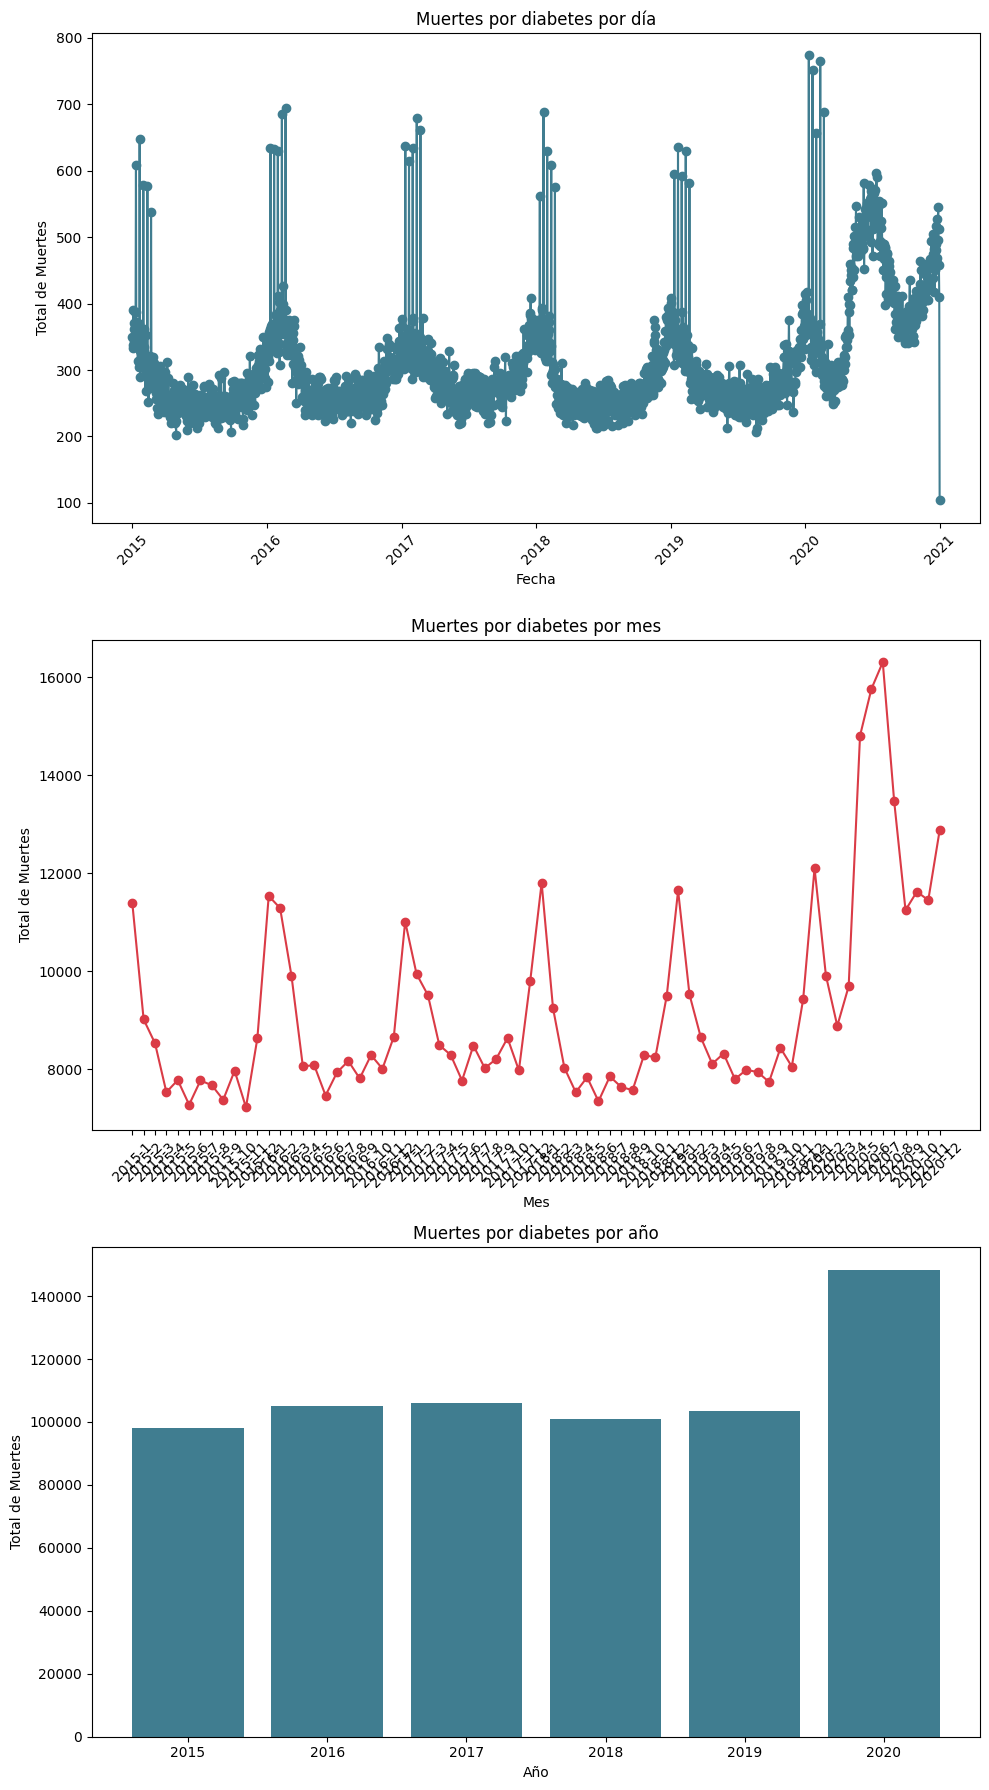

In [ ]:
# Convertir la columna 'FECHA_OCURR' a tipo fecha
ts['FECHA_OCURR'] = pd.to_datetime(ts['FECHA_OCURR'])

# Filtrar solo las fechas a partir del año 2010
ts = ts[ts['FECHA_OCURR'] >= '2015-01-01']

# Comprobar si hay valores nulos
if ts.isnull().sum().any():
    ts = ts.fillna(method='ffill')  # Rellenar valores nulos con el valor anterior

# Extraer columnas para día, mes y año
ts['AÑO'] = ts['FECHA_OCURR'].dt.year
ts['MES'] = ts['FECHA_OCURR'].dt.month
ts['DIA'] = ts['FECHA_OCURR'].dt.day

# Agrupar por día
ts_dia = ts.groupby(['FECHA_OCURR'])['TOT_DEF_DIAB'].sum().reset_index()

# Agrupar por mes
ts_mes = ts.groupby(['AÑO', 'MES'])['TOT_DEF_DIAB'].sum().reset_index()
ts_mes['FECHA'] = ts_mes['AÑO'].astype(str) + '-' + ts_mes['MES'].astype(str)

# Agrupar por año
ts_año = ts.groupby(['AÑO'])['TOT_DEF_DIAB'].sum().reset_index()

# Crear las subgráficas
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Gráfica 1: Muertes por día
axs[0].plot(ts_dia['FECHA_OCURR'], ts_dia['TOT_DEF_DIAB'], color='#407d90', marker='o', linestyle='-')
axs[0].set_title('Muertes por diabetes por día')
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Total de Muertes')
axs[0].tick_params(axis='x', rotation=45)

# Gráfica 2: Muertes por mes
axs[1].plot(ts_mes['FECHA'], ts_mes['TOT_DEF_DIAB'], color='#da3b46', marker='o', linestyle='-')
axs[1].set_title('Muertes por diabetes por mes')
axs[1].set_xlabel('Mes')
axs[1].set_ylabel('Total de Muertes')
axs[1].tick_params(axis='x', rotation=45)

# Gráfica 3: Muertes por año
axs[2].bar(ts_año['AÑO'], ts_año['TOT_DEF_DIAB'], color='#407d90')
axs[2].set_title('Muertes por diabetes por año')
axs[2].set_xlabel('Año')
axs[2].set_ylabel('Total de Muertes')

# Ajustar el espaciado entre subgráficas
plt.tight_layout()

# Mostrar las gráficas
plt.show()

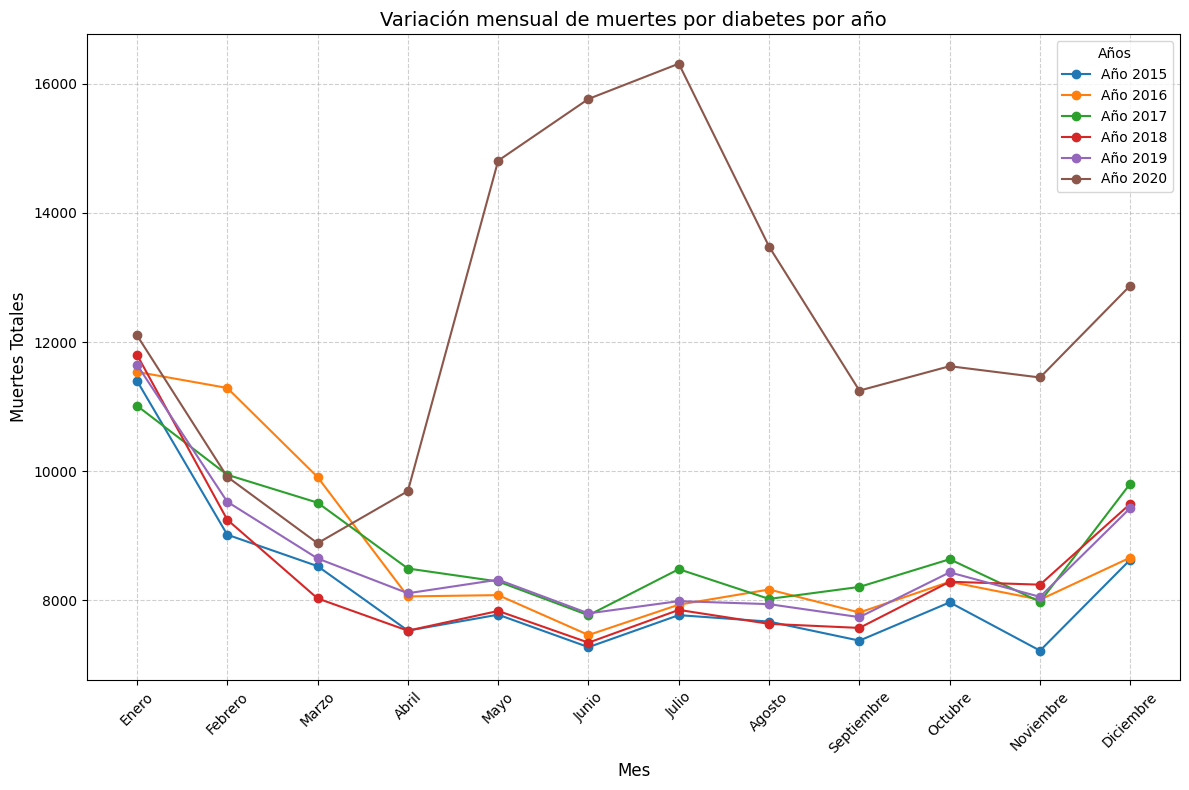

In [ ]:
# Cargar el conjunto de datos
ts = pd.read_csv("DEFUN_DIAB_TS.csv")

# Convertir la columna 'FECHA_OCURR' a tipo fecha
ts['FECHA_OCURR'] = pd.to_datetime(ts['FECHA_OCURR'])

# Filtrar solo las fechas a partir del año 2010
ts = ts[ts['FECHA_OCURR'] >= '2015-01-01']

# Comprobar si hay valores nulos y rellenarlos
if ts.isnull().sum().any():
    ts = ts.fillna(method='ffill')

# Extraer columnas para año y mes
ts['AÑO'] = ts['FECHA_OCURR'].dt.year
ts['MES'] = ts['FECHA_OCURR'].dt.month

# Agrupar por año y mes
ts_mes = ts.groupby(['AÑO', 'MES'])['TOT_DEF_DIAB'].sum().reset_index()

# Crear la gráfica para variación mensual por año
plt.figure(figsize=(12, 8))

# Iterar sobre cada año y trazar su línea
for año in ts_mes['AÑO'].unique():
    datos_año = ts_mes[ts_mes['AÑO'] == año]
    plt.plot(
        datos_año['MES'],
        datos_año['TOT_DEF_DIAB'],
        marker='o',
        label=f"Año {año}"
    )

# Configurar etiquetas y título
plt.title("Variación mensual de muertes por diabetes por año", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Muertes Totales", fontsize=12)

# Ajustar las etiquetas del eje x para que correspondan a los meses
plt.xticks(range(1, 13), [
    "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
], rotation=45)

# Mostrar la leyenda
plt.legend(title="Años", loc='upper right')

# Mostrar la gráfica
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# Preparar los datos para el modelo
X = ts_mes[['AÑO', 'MES']]  # Características: año y mes
y = ts_mes['TOT_DEF_DIAB']  # Variable objetivo: total de muertes por diabetes

# Dividir los datos en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, shuffle=False)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Realizar las predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostrar las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 4516385.716477758
R-squared (R2): 0.12353898151671083


In [ ]:
# Crear el DataFrame con los meses de 2021 que queremos predecir
predictions_data = pd.DataFrame({'AÑO': [2021]*12, 'MES': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

# Asegúrate de que las columnas de 'predictions_data' coincidan con las usadas en el modelo
# Si el modelo fue entrenado con columnas adicionales, añádelas aquí.

# Realizar las predicciones
predictions = model.predict(predictions_data)

# Mostrar las predicciones
for month, pred in zip(predictions_data['MES'], predictions):
    print(f"Predicción para {month}/2021: {pred:.2f} muertes")

Predicción para 1/2021: 11872.04 muertes
Predicción para 2/2021: 11654.85 muertes
Predicción para 3/2021: 11437.67 muertes
Predicción para 4/2021: 11220.48 muertes
Predicción para 5/2021: 11003.29 muertes
Predicción para 6/2021: 10786.11 muertes
Predicción para 7/2021: 10568.92 muertes
Predicción para 8/2021: 10351.73 muertes
Predicción para 9/2021: 10134.54 muertes
Predicción para 10/2021: 9917.36 muertes
Predicción para 11/2021: 9700.17 muertes
Predicción para 12/2021: 9482.98 muertes


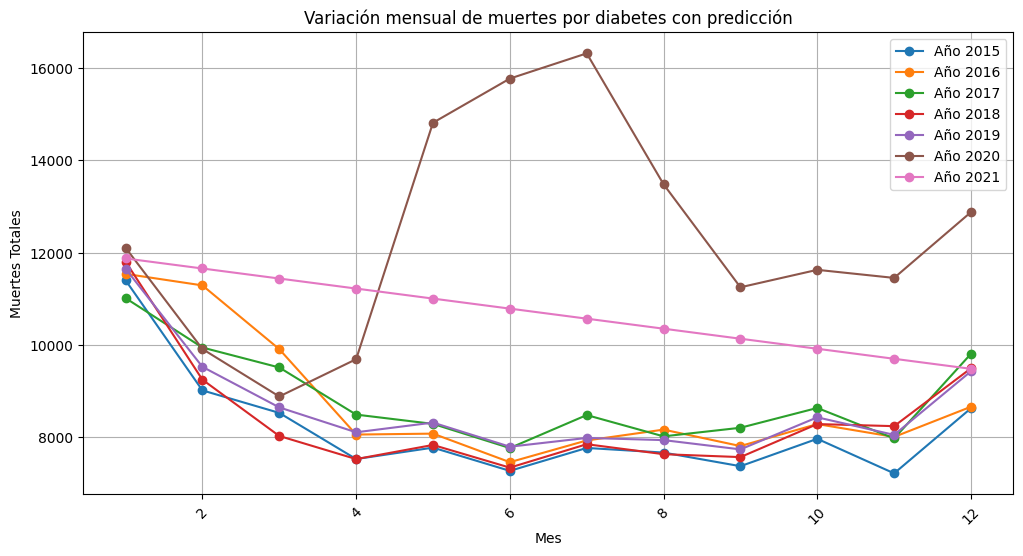

In [ ]:
# Asegurarse de que 'ts_mes' tiene las columnas correctas
ts_mes = ts_mes[['AÑO', 'MES', 'TOT_DEF_DIAB']]

# Crear un DataFrame con las predicciones
pred_df = pd.DataFrame({
    "AÑO": [2021] * len(predictions),  # Suponiendo que la predicción es para 2021
    "MES": range(1, len(predictions) + 1),  # Meses 1, 2, 3, 4...
    "TOT_DEF_DIAB": predictions
})

# Unir los datos reales con los predichos
df = pd.concat([ts_mes, pred_df])

# Filtrar desde 2015 en adelante
df = df[df["AÑO"] >= 2015]

# Configurar la gráfica
plt.figure(figsize=(12, 6))

# Graficar cada año
for year in df["AÑO"].unique():
    subset = df[df["AÑO"] == year]
    plt.plot(subset["MES"], subset["TOT_DEF_DIAB"], marker='o', linestyle='-', label=f"Año {year}")

# Personalizar la gráfica
plt.xlabel("Mes")
plt.ylabel("Muertes Totales")
plt.title("Variación mensual de muertes por diabetes con predicción")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()




In [ ]:
y_train = np.log(y_train)
y_test = np.log(y_test)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
df_prophet = ts_mes[['AÑO', 'MES', 'TOT_DEF_DIAB']].copy()

# Renombramos columnas para que Prophet las entienda
df_prophet.rename(columns={'AÑO': 'year', 'MES': 'month', 'TOT_DEF_DIAB': 'y'}, inplace=True)

# Crear la columna de fecha ('ds') usando el día 1 de cada mes
df_prophet['ds'] = pd.to_datetime(df_prophet[['year', 'month']].assign(day=1))

# Eliminar columnas innecesarias
df_prophet = df_prophet[['ds', 'y']]

# Ver los primeros datos para comprobar
print(df_prophet.head())



  ds          y    
0 2015-01-01  11401
1 2015-02-01   9016
2 2015-03-01   8529
3 2015-04-01   7530
4 2015-05-01   7777


In [ ]:
## El error "ModuleNotFoundError: No module named 'fbprophet'" significa que la librería fbprophet no está instalada en tu entorno de trabajo.
## Se necerita descargar utilizando:
## !pip install prophet


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mawmvl8/bsed7eph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mawmvl8/gyye4z1i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66671', 'data', 'file=/tmp/tmp0mawmvl8/bsed7eph.json', 'init=/tmp/tmp0mawmvl8/gyye4z1i.json', 'output', 'file=/tmp/tmp0mawmvl8/prophet_modelgeo84lj2/prophet_model-20250119002324.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:23:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:23:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

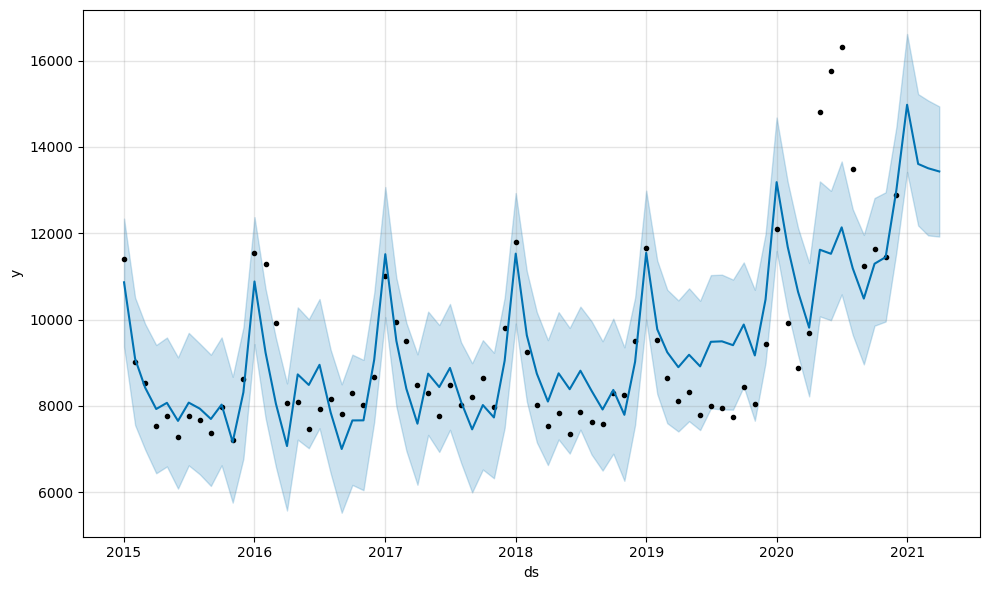

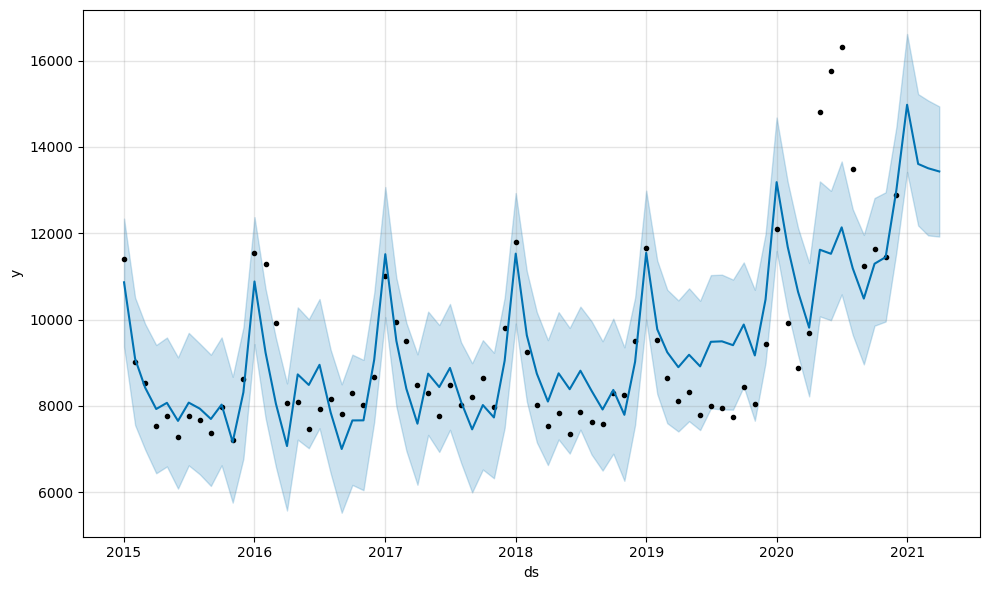

In [ ]:
from prophet import Prophet

# Crear modelo Prophet
model = Prophet()
model.fit(df_prophet)

# Generar fechas futuras (próximos 4 meses)
future = model.make_future_dataframe(periods=4, freq='M')

# Hacer predicciones
forecast = model.predict(future)

# Graficar predicciones
model.plot(forecast)
